In [1]:
import string
from collections import Counter
import numpy as np

#import pygal
import matplotlib.pyplot as plt
import nltk
#nltk.download('vader_lexicon')

import pandas as pd

In [2]:
df = pd.read_csv("sell.csv")
df1=df[['selftext','num_comments','score','title']]
df1=df1.dropna(subset=['selftext'])

#drop meaningless text
df1=df1[(df1.selftext!='[removed]') & (df1.selftext!='[deleted]')]
#df1=df1[(df1.selftext!=' [ ') & (df1.selftext!=' ')]

#drop duplicate
df1=df1.drop_duplicates(subset=['selftext']).reset_index()
df1

,index,selftext,num_comments,score,title
0,0,djing house music year wondering advice give s...,5,2,What's the best way to get started producing?
1,1,sorry allowed here pinged mod never heard back...,0,1,"[FOR SALE] 12"" Vinyl DJ House music collection..."
2,2,hello dad co owner house mom divorced re marri...,0,0,New home puchase
3,3,selling vinyl single really want weird still e...,0,5,[Question] Does anybody have any experience wi...
4,4,hey everyone girlfriend one first people canad...,0,1,SELLING: 2 Guaranteed Tomorrowland 2015 Ticket...
5,5,hi everybody looking new house music youtube c...,9,1,Good House youtube channels ?
6,6,im currently process putting house market im m...,0,1,I’m sad about selling my house. Advice?
7,7,nthm tech house set june different type sh t s...,0,1,INSIDE: Hour-long Set with All Different Types...
8,8,thinking lately curious hear opinion club much...,1,2,"[Discussion] late night sets, yay or nay?"
9,9,watchu got reddit,0,1,"Looking for a delicious, funky house/dance mix..."


In [3]:
df_word=pd.read_csv('EMOTION.csv')
df_word=df_word[df_word['emotion-intensity-score']>0.6]
df_word

,word,emotion,emotion-intensity-score
0,outraged,anger,0.964
1,brutality,anger,0.959
2,hatred,anger,0.953
3,hateful,anger,0.940
4,terrorize,anger,0.939
...,...,...,...
8758,inspired,trust,0.602
8759,brighten,trust,0.602
8760,sympathetic,trust,0.602
8761,fulfill,trust,0.602


In [4]:
set(df_word.emotion)

{'anger',
 'anticipation',
 'disgust',
 'fear',
 'joy',
 'sadness',
 'surprise',
 'trust'}

## Find specific emotional words

In [5]:
df_word[df_word.word == 'risk']

,word,emotion,emotion-intensity-score


In [6]:
df_word[df_word.word == 'account']

,word,emotion,emotion-intensity-score


In [7]:
df_word[df_word.word == 'time']

,word,emotion,emotion-intensity-score


In [8]:
df_word= df_word[df_word.word != 'fire']
df_word= df_word[df_word.word != 'account']

## General Barplot

In [9]:
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself",
              "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself",
              "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these",
              "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do",
              "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while",
              "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before",
              "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again",
              "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each",
              "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than",
              "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"]

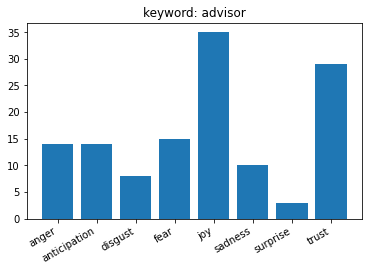

In [10]:
col = [x for x in df1['selftext']]
text = str(col)

lower_case = text.lower()
# Removing punctuations
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))
tokenized_words = cleaned_text.split()
final_words = []
for word in tokenized_words:
    if word not in stop_words:
        final_words.append(word)
        

emotion_list = []
word=list(df_word.word)
emotion=list(df_word.emotion)

for i in range(len(df_word)):
    if word[i] in final_words:
        emotion_list.append(emotion[i])
            
w = Counter(emotion_list)
            
            
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.title('keyword: advisor')
plt.show()

In [11]:
def emo(tokens,emo):
    zip_iterator = zip(df_word.word, df_word.emotion)
    D= dict(zip_iterator)
    newDict = dict(filter(lambda x: x[1]== emo, D.items()))
    emotion_words=list(newDict.keys())
    List=list(itertools.chain(*tokens))
    
    result = []
    for word in List:
        if word in emotion_words:
            result.append(word)
    return result

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def wordcloud(words):

    # Create a list of word
    text=' '.join(words)

    # Create the wordcloud object
    wordcloud = WordCloud(width=1500, height=1000, margin=0,background_color='white').generate(text)

    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)
    plt.show()

In [13]:
import nltk
lower_case = df1['selftext'].str.lower()
cleaned_text = lower_case.str.translate(str.maketrans('', '', string.punctuation))
tokens=cleaned_text.apply(lambda x: nltk.word_tokenize(x))
print(tokens)

0     [djing, house, music, year, wondering, advice,...
1     [sorry, allowed, here, pinged, mod, never, hea...
2     [hello, dad, co, owner, house, mom, divorced, ...
3     [selling, vinyl, single, really, want, weird, ...
4     [hey, everyone, girlfriend, one, first, people...
5     [hi, everybody, looking, new, house, music, yo...
6     [im, currently, process, putting, house, marke...
7     [nthm, tech, house, set, june, different, type...
8     [thinking, lately, curious, hear, opinion, clu...
9                                 [watchu, got, reddit]
10    [went, watch, pete, tog, playing, heritage, or...
11    [hi, im, trying, find, solution, problem, wond...
12    [looking, get, track, wordless, people, called...
13    [hey, guy, made, house, tune, really, proud, o...
14    [name, first, song, start, house, music, podca...
15    [searching, website, sell, single, house, musi...
16    [hey, excited, share, recent, mix, mixed, live...
17    [real, fan, old, school, soulful, sound, t

In [14]:
import itertools

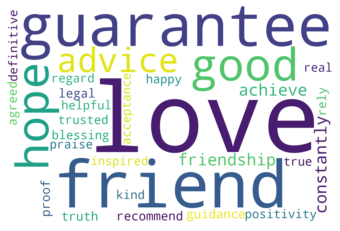

In [15]:

trust=emo(tokens,'trust')
wordcloud(trust)

In [16]:
Counter(trust).most_common(10)

[('love', 15),
 ('friend', 5),
 ('guarantee', 4),
 ('good', 3),
 ('hope', 3),
 ('advice', 2),
 ('friendship', 2),
 ('achieve', 2),
 ('constantly', 2),
 ('guidance', 1)]

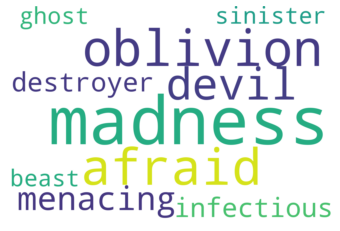

In [17]:
fear=emo(tokens,'fear')
wordcloud(fear)

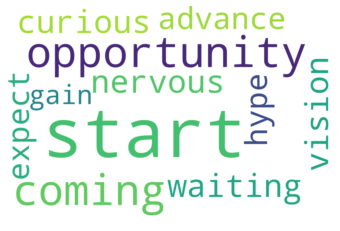

In [18]:
anticipation=emo(tokens,'anticipation')
wordcloud(anticipation)

In [19]:
Counter(anticipation).most_common(10)

[('start', 8),
 ('opportunity', 2),
 ('coming', 2),
 ('nervous', 1),
 ('waiting', 1),
 ('curious', 1),
 ('vision', 1),
 ('advance', 1),
 ('hype', 1),
 ('expect', 1)]

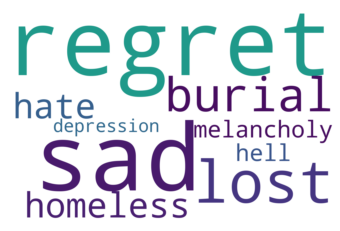

In [20]:
sadness=emo(tokens,'sadness')
wordcloud(sadness)

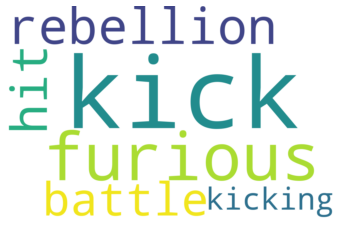

In [21]:
anger=emo(tokens,'anger')
wordcloud(anger)

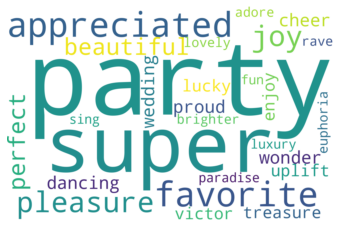

In [22]:
joy=emo(tokens,'joy')
wordcloud(joy)